### Initial Configuration

In [1]:
# Set logging
import logging

logging.basicConfig(level=logging.DEBUG)

# Set the GPU_ENABLED Flag to True
import os
os.environ['GPU_ENABLED'] = 'True'
print(os.environ['GPU_ENABLED'])  # Should print 'True'

True


### Load a Story

In [2]:
from story_wrapper.models.story import Story
from story_wrapper.data_loaders.gutenberg import Gutenberg
from story_wrapper.config_spacy import nlp_service

In [3]:
g_corpus = Gutenberg()
book = g_corpus.get_book_object(13034)

INFO:root:Indexing Gutenberg corpus.
INFO:root:Reading metadata from /home/ben/Projects/story-wrapper/src/story_wrapper/data_loaders/indexes/md.pickle.gz
INFO:root:Indexing complete.
INFO:root:Number of books in Gutenberg corpus: 69478
 at line 8197 line: End of Project Gutenberg's Mary Minds Her Business, by George Weston
DEBUG:root:TOC locations to be deleted: []
INFO:root:Heading locations: [292, 408, 512, 625, 942, 1108, 1255, 1343, 1434, 1643, 1896, 2151, 2367, 2539, 2676, 2937, 3082, 3212, 3416, 3516, 3717, 4010, 4140, 4388, 4616, 5364, 5534, 6361, 6419, 6807, 6973, 7201, 7349, 7670, 7815, 7980, 8086, 8197]
INFO:root:Headings: ['CHAPTER I\r', 'CHAPTER II\r', 'CHAPTER III\r', 'CHAPTER IV\r', 'CHAPTER V\r', 'CHAPTER VI\r', 'CHAPTER VII\r', 'CHAPTER VIII\r', 'CHAPTER IX\r', 'CHAPTER X\r', 'CHAPTER XI\r', 'CHAPTER XII\r', 'CHAPTER XIII\r', 'CHAPTER XIV\r', 'CHAPTER XV\r', 'CHAPTER XVI\r', 'CHAPTER XVII\r', 'CHAPTER XVIII\r', 'CHAPTER XIX\r', 'CHAPTER XX\r', 'CHAPTER XXI\r', 'CHAPTER 

In [4]:
story = Story(book.paragraphs)

INFO:root:Loading Spacy Model en_core_web_trf
INFO:root:GPU Enabled: True - Using GPU
/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:root:Configuring NLP Pipeline and Custom Properties


## Costing Calculators

In [6]:
len(story)

2083

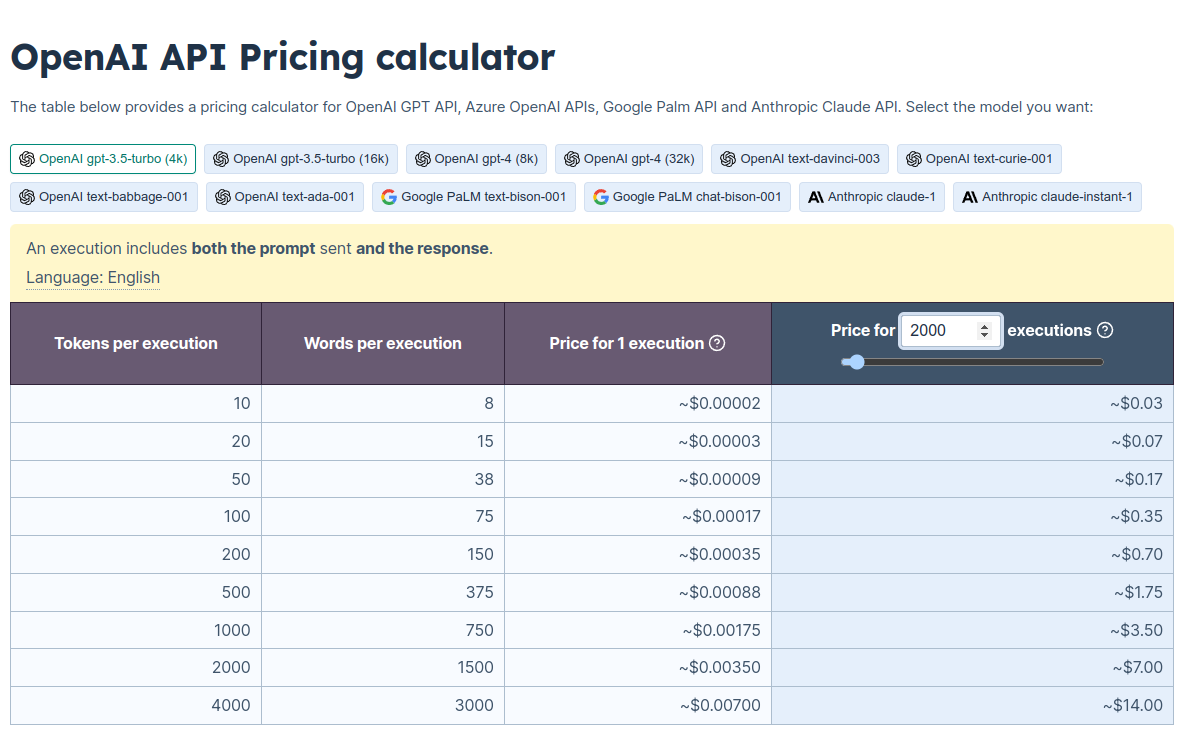

Some back of the envelope calculations for whether we can use GPT-3.5 on paragraphs.

In [11]:
import tiktoken
import math


def count_total_tokens(texts: list[str], encoding_name: str = "cl100k_base") -> int:
    """
    Counts the total number of tokens in a list of strings.

    Args:
        texts: A list of strings.
        encoding_name: The encoding name to be used for counting tokens.

    Returns:
        The total number of tokens in the list.
    """
    # Initialize a counter
    total_tokens = 0

    # Loop over each row in the dataframe
    for text in texts:
        # Count the tokens in the text
        num_tokens = count_tokens(text, encoding_name)
        # Add the number of tokens to the total
        total_tokens += num_tokens

    return total_tokens


def calculate_cost(texts: list[str], multiplier: int = 2, encoding_name: str = "cl100k_base") -> str:
    """
    Calculates the cost of LLM queries on a list of strings.

    Args:
        texts: A list of strings.
        multiplier: A multiplying factor to take into account extra prompt text and output.
        encoding_name: The encoding name to be used for counting tokens.

    Returns:
        a cost estimate.
    """
    # Count the total tokens 
    total_tokens = count_total_tokens(texts, encoding_name)

    # Compute the cost in dollars
    cost = (total_tokens / 1000) * 0.002
    multiplied_cost = cost * multiplier
    # Round up to the nearest cent
    rounded_cost = math.ceil(cost * 100) / 100
    cost_str = f'${rounded_cost:.2f}'

    return cost_str


def count_tokens(text: str, encoding_name: str = "cl100k_base") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(text))
    return num_tokens

In [12]:
calculate_cost(story.text)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): openaipublic.blob.core.windows.net:443
DEBUG:urllib3.connectionpool:https://openaipublic.blob.core.windows.net:443 "GET /encodings/cl100k_base.tiktoken HTTP/1.1" 200 1681126


'$0.16'

In [13]:
count_tokens(story.text[0])

18

In [18]:
story.text[25:35]

['"Any of them married?" she continued.',
 '"All but me."',
 '"My dear! ... You don\'t mean to say that they have made you an aunt already?"',
 'Martha paused with that inward look which generally accompanies mental arithmetic.',
 '"Only about seventeen times," she finally laughed again.',
 'When their guest had gone, the two sisters fairly danced around each other.',
 '"Oh, Patty!" exulted Miss Cordelia, "I\'m sure she\'s a fruitful vine!"',
 'There is something inexorable in the purpose of a maiden lady--perhaps because she has no minor domestic troubles to distract her; and when you have two maiden ladies working on the same problem, and both of them possessed of wealth and unusual intelligence--!',
 "They started by taking Martha to North East Harbor for the balance of the summer, and then to keep her from going west in the fall, they engaged her to teach them French that winter at quite a fabulous salary. They also took her to Boston and bought her some of the prettiest dresses im

In [19]:
count_total_tokens(story.text)

76006

In [22]:
(76006/1000)*0.002*2

0.304024

So actually at ~20-30p looks afforable for one GPT3.5 call per paragraph.

## Characters

In [5]:
story.characters()

['Patty',
 'Cordelia',
 'Josiah',
 'Patricia',
 'Cordelia',
 'Spencers',
 'Cordelia',
 'Cordelia',
 'Spencer',
 'Cordelia',
 'Patty',
 'Josiah',
 'Spicers',
 'Abner Spicer',
 'an Ezra Babcock',
 'Josiah Spencer',
 'Josiah',
 'Cordelia',
 'Patty',
 'Josiah',
 'Cordelia',
 'Pearsons',
 'Martha Berger',
 'Pearsons',
 'Cordelia',
 'Patty',
 'Martha',
 'Cordelia',
 'Martha',
 'Patty',
 'Cordelia',
 'Martha',
 'Josiah',
 'Martha',
 'Martha',
 'Cordelia',
 'Martha',
 'Spencers',
 'Cordelia',
 'Josiah',
 'Abner Spencer',
 'Ezra Babcock',
 'Josiah Spencer',
 'Cordelia',
 'Patty',
 'Spencer',
 'Josiah',
 'Josiah',
 'Josiah',
 'Spencer',
 'Martha',
 'Cordelia',
 'Patty',
 'Josiah',
 'Patty',
 'Sarah',
 'Sarah',
 'Martha',
 'Martha',
 'Cordelia',
 'Martha',
 'Patty',
 'Cordelia',
 'Martha',
 'Patty',
 'Martha',
 'Cordelia',
 'Barbara Fritchie',
 'Patrick Henry',
 'Josiah',
 'Cordelia',
 'Patty',
 'Cordelia',
 'Patty',
 'Patty',
 'Cordelia',
 'Cordelia',
 'Patty',
 'Josiah',
 'Cordelia',
 'Basil',


We can maybe think about processing serially.

As we run through we can build a set of ent strings. These are candidates.

When we hit a name there are several options:
* It's a new character;
* It's a match for a previous character.

In [23]:
set(story.characters())

{'Abner Spencer',
 'Abner Spicer',
 'Archey',
 'Archey Forbes',
 'Archibald Forbes',
 'Barbara Fritchie',
 'Basil',
 'Becky',
 'Betsey',
 'Betsey Ross',
 'Bill',
 'Black Jack',
 'Bob McAllister',
 'Bols',
 'Brad',
 'Buckingham',
 'Burdon',
 'Burdon Woodward',
 "Burdon Woodward's",
 'Burdon Woodward--',
 'Cabot',
 'Chip',
 'Columbus',
 'Coppelia',
 'Cordelia',
 'Cousin Stanley',
 'Cutler',
 'David Copperfield',
 'Delia',
 'Delibes',
 'Destiny',
 'Don Juan',
 'Dora',
 'Doris',
 'Edsol',
 'Eve',
 'Ezra Babcock',
 'Fanny',
 'Forbes',
 'Fulton',
 'Garde',
 'George Washington',
 'Hagar',
 'Haskins',
 'Helen',
 'Helen Cabot',
 'Hutch',
 'Hutchins',
 'Ishmaels',
 'Jack',
 'James',
 'James Kelly',
 'James O. MacPherson',
 'Jason',
 'Jimmy',
 'Jimmy Kelly',
 'Jingo',
 'Joan of Arc',
 'Joe',
 'Joseph',
 'Josiah',
 'Josiah Spencer',
 'Josiah Spencers',
 'Josiahs',
 'Jove',
 'Juanita',
 'Judas',
 'Kelly',
 'Kidd',
 'Lieutenant Cabot',
 'Lorelei',
 "M'sieur Beaucaire",
 'M. Spencer',
 'MARY SPENCER'

In [6]:
story.count_characters()

Counter({'Mary': 582,
         'Helen': 178,
         'Wally': 112,
         'Cordelia': 73,
         'Archey': 69,
         'Burdon': 65,
         'Patty': 63,
         'Josiah': 60,
         'Stanley': 59,
         'Paul': 52,
         'Spencer': 40,
         'Cutler': 27,
         'Martha': 20,
         'Hutchins': 15,
         'Burdon Woodward': 14,
         'Joe': 14,
         'Woodward': 12,
         'Maynard': 11,
         'Parsons': 10,
         'Wally Cabot': 10,
         'Mac': 10,
         'Spencers': 9,
         'Archey Forbes': 9,
         'Ridge': 7,
         'Kelly': 7,
         'Rosa': 6,
         'Strauss': 6,
         'Josiah Spencer': 4,
         'Stanley Woodward': 4,
         'Sam Reisinger': 4,
         'Marsh': 4,
         'Vera': 3,
         'Washington': 3,
         'MacPherson': 3,
         "Ma'm Maynard's": 3,
         'Josiah Spencers': 3,
         'Haskins': 3,
         'Repetti': 3,
         'Forbes': 3,
         'Patricia': 2,
         'Pearsons': 2,
    

In [7]:
"Mary".split()

['Mary']

In [8]:
multiple_words = [c for c in story.characters() if len(c.split()) > 1]

In [9]:
multiple_words

['Abner Spicer',
 'an Ezra Babcock',
 'Josiah Spencer',
 'Martha Berger',
 'Abner Spencer',
 'Ezra Babcock',
 'Josiah Spencer',
 'Barbara Fritchie',
 'Patrick Henry',
 'the Angel of Death',
 'the Angel of Life',
 'the Dauphin of',
 'Stanley Woodward',
 'Cousin Stanley',
 'Cousin Stanley',
 'Stanley Woodward',
 'Archey Forbes',
 'Bob McAllister',
 'Mon Dieu',
 'St. Cecilia',
 'Wally Cabot',
 'Wally Cabot',
 'Walter Cabot',
 'Will Thompson',
 'Josiah Spencer',
 'George Washington',
 'Wally Cabot',
 "Mary Spencer'--you",
 'M. Spencer',
 'Uncle Stanley',
 'Stanley Woodward',
 'Wally Cabot',
 'Burdon Woodward',
 'David Copperfield',
 'Black Jack',
 'Burdon Woodward',
 'Burdon Woodward',
 'Archey Forbes',
 'Wally Cabot',
 'Burdon Woodward',
 'Archey Forbes',
 "Wally Cabot's",
 'Mary Spencer',
 'Betsey Ross',
 'Joan of Arc',
 'Burdon Woodward',
 "Ma'm Maynard's",
 'Archey Forbes',
 'Wally Cabot',
 'Stanley Woodward',
 'James O. MacPherson',
 'Archey Forbes',
 'Josiah Spencers',
 'Archey Forbe

In [13]:
character_names = story.characters()

In [33]:
from collections import defaultdict

def (character_names: list) -> dict:
    """Build a dictionary of unique names."""
    name_dict = defaultdict(set)
    for name in character_names:
        name_parts = name.split()
        first_name = name_parts[0].lower()  # Normalizing to lowercase
        name_dict[first_name].add(name)
    return {k: list(v) for k, v in name_dict.items()}

unique_name_dict = build_unique_name_dict(character_names)
print(unique_name_dict)

{'patty': ['Patty'], 'cordelia': ['Cordelia'], 'josiah': ['Josiah', 'Josiah Spencer', 'Josiah Spencers'], 'patricia': ['Patricia'], 'spencers': ['Spencers'], 'spencer': ['Spencer'], 'spicers': ['Spicers'], 'abner': ['Abner Spicer', 'Abner Spencer'], 'an': ['an Ezra Babcock'], 'pearsons': ['Pearsons'], 'martha': ['Martha Berger', 'Martha'], 'ezra': ['Ezra Babcock'], 'sarah': ['Sarah'], 'barbara': ['Barbara Fritchie'], 'patrick': ['Patrick Henry'], 'basil': ['Basil'], 'the': ['the Dauphin of', 'the Angel of Death', 'the Angel of Life'], 'mary': ["Mary Spencer'--you", 'Mary Spencer', 'MARY SPENCER', 'Mary'], 'maynard': ['Maynard'], "t'delia": ["T'delia"], 'eve': ['Eve'], 'woodward': ['Woodward'], 'stanley': ['Stanley', 'Stanley Woodward'], 'cousin': ['Cousin Stanley'], 'burdon': ["Burdon Woodward's", 'Burdon Woodward', 'Burdon', 'Burdon Woodward--'], 'chip': ['Chip'], 'archey': ['Archey Forbes', 'Archey'], 'spicer': ['Spicer'], 'helen': ['Helen', 'Helen Cabot'], 'bob': ['Bob McAllister'],

In [15]:
spacy_characters = []
for doc in story.docs:
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            spacy_characters.append(ent)

In [16]:
spacy_characters

[Patty,
 Cordelia,
 Josiah,
 Patricia,
 Cordelia,
 Spencers,
 Cordelia,
 Cordelia,
 Spencer,
 Cordelia,
 Patty,
 Josiah,
 Spicers,
 Abner Spicer,
 an Ezra Babcock,
 Josiah Spencer,
 Josiah,
 Cordelia,
 Patty,
 Josiah,
 Cordelia,
 Pearsons,
 Martha Berger,
 Pearsons,
 Cordelia,
 Patty,
 Martha,
 Cordelia,
 Martha,
 Patty,
 Cordelia,
 Martha,
 Josiah,
 Martha,
 Martha,
 Cordelia,
 Martha,
 Spencers,
 Cordelia,
 Josiah,
 Abner Spencer,
 Ezra Babcock,
 Josiah Spencer,
 Cordelia,
 Patty,
 Spencer,
 Josiah,
 Josiah,
 Josiah,
 Spencer,
 Martha,
 Cordelia,
 Patty,
 Josiah,
 Patty,
 Sarah,
 Sarah,
 Martha,
 Martha,
 Cordelia,
 Martha,
 Patty,
 Cordelia,
 Martha,
 Patty,
 Martha,
 Cordelia,
 Barbara Fritchie,
 Patrick Henry,
 Josiah,
 Cordelia,
 Patty,
 Cordelia,
 Patty,
 Patty,
 Cordelia,
 Cordelia,
 Patty,
 Josiah,
 Cordelia,
 Basil,
 Cordelia,
 Cordelia,
 Patricia,
 Martha,
 Martha,
 Josiah,
 Martha,
 Martha,
 Martha,
 the Angel of Death,
 the Angel of Life,
 Cordelia,
 Josiah,
 Josiah,
 Cord

In [20]:
spacy_characters[14][0], spacy_characters[14][0].pos_

(an, 'DET')

In [21]:
for char in spacy_characters:
    if char[0].pos_ == "DET":
        print(f"{char.text} has a leading DET. Name without: {char[1:].text}")

an Ezra Babcock has a leading DET. Name without: Ezra Babcock
the Angel of Death has a leading DET. Name without: Angel of Death
the Angel of Life has a leading DET. Name without: Angel of Life
the Dauphin of has a leading DET. Name without: Dauphin of
a Mary McMillan has a leading DET. Name without: Mary McMillan


In [27]:
from typing import List, Dict, Union
from spacy.tokens import Span

def clean_entities(spacy_characters: List[Span]) -> List[Dict[str, Union[str | Span]]]:
    """Clean and store SpaCy character entities."""
    cleaned_chars = []
    for char in spacy_characters:
        char_dict = {"original": char.text, "cleaned": char.text, "ent_span": char}

        # Remove leading determiners
        if char[0].pos_ == "DET":
            char_dict["cleaned"] = char[1:].text

        # Remove trailing possessives
        if char[-1].text == "'s" or char[-1].text == "’s":
            char_dict["cleaned"] = char[:-1].text
            
        

        cleaned_chars.append(char_dict)
    return cleaned_chars

In [28]:
cleaned = clean_entities(spacy_characters)

In [29]:
cleaned

[{'original': 'Patty', 'cleaned': 'Patty', 'ent_span': Patty},
 {'original': 'Cordelia', 'cleaned': 'Cordelia', 'ent_span': Cordelia},
 {'original': 'Josiah', 'cleaned': 'Josiah', 'ent_span': Josiah},
 {'original': 'Patricia', 'cleaned': 'Patricia', 'ent_span': Patricia},
 {'original': 'Cordelia', 'cleaned': 'Cordelia', 'ent_span': Cordelia},
 {'original': 'Spencers', 'cleaned': 'Spencers', 'ent_span': Spencers},
 {'original': 'Cordelia', 'cleaned': 'Cordelia', 'ent_span': Cordelia},
 {'original': 'Cordelia', 'cleaned': 'Cordelia', 'ent_span': Cordelia},
 {'original': 'Spencer', 'cleaned': 'Spencer', 'ent_span': Spencer},
 {'original': 'Cordelia', 'cleaned': 'Cordelia', 'ent_span': Cordelia},
 {'original': 'Patty', 'cleaned': 'Patty', 'ent_span': Patty},
 {'original': 'Josiah', 'cleaned': 'Josiah', 'ent_span': Josiah},
 {'original': 'Spicers', 'cleaned': 'Spicers', 'ent_span': Spicers},
 {'original': 'Abner Spicer',
  'cleaned': 'Abner Spicer',
  'ent_span': Abner Spicer},
 {'original'

In [35]:
unique = build_unique_name_dict([c['cleaned'] for c in cleaned])

In [36]:
unique['burdon']

['Burdon Woodward', 'Burdon', 'Burdon Woodward--']

In [37]:
burdon = [c for c in cleaned if c['cleaned'] == 'Burdon Woodward--']

In [38]:
burdon

[{'original': 'Burdon Woodward--',
  'cleaned': 'Burdon Woodward--',
  'ent_span': Burdon Woodward--}]

In [40]:
len(burdon[0]['ent_span'])

2

In [41]:
burdon[0]['ent_span'][-1]

Woodward--

In [42]:
unique

{'patty': ['Patty'],
 'cordelia': ['Cordelia'],
 'josiah': ['Josiah', 'Josiah Spencer', 'Josiah Spencers'],
 'patricia': ['Patricia'],
 'spencers': ['Spencers'],
 'spencer': ['Spencer'],
 'spicers': ['Spicers'],
 'abner': ['Abner Spicer', 'Abner Spencer'],
 'ezra': ['Ezra Babcock'],
 'pearsons': ['Pearsons'],
 'martha': ['Martha Berger', 'Martha'],
 'sarah': ['Sarah'],
 'barbara': ['Barbara Fritchie'],
 'patrick': ['Patrick Henry'],
 'basil': ['Basil'],
 'angel': ['Angel of Death', 'Angel of Life'],
 'mary': ['Mary McMillan',
  'MARY SPENCER',
  'Mary',
  "Mary Spencer'--you",
  'Mary Spencer'],
 'dauphin': ['Dauphin of'],
 'maynard': ['Maynard'],
 "t'delia": ["T'delia"],
 'eve': ['Eve'],
 'woodward': ['Woodward'],
 'stanley': ['Stanley', 'Stanley Woodward'],
 'cousin': ['Cousin Stanley'],
 'burdon': ['Burdon Woodward', 'Burdon', 'Burdon Woodward--'],
 'chip': ['Chip'],
 'archey': ['Archey Forbes', 'Archey'],
 'spicer': ['Spicer'],
 'helen': ['Helen', 'Helen Cabot'],
 'bob': ['Bob McAl

In [43]:
def find_single_reference_names(name_dict: Dict[str, List[str]]) -> Dict[str, str]:
    """
    Identify names that only appear with one full-name configuration.
    Modified to handle edge cases.
    """
    single_reference_names = {}
    for first_name, full_names in name_dict.items():
        # Normalize case
        full_names = [name.lower() for name in full_names]
        
        # Filter out polluted names and single first names
        clean_full_names = [name for name in full_names if name.isalpha() and name != first_name]
        
        # If there's only one unique full name, consider it a single reference name
        if len(set(clean_full_names)) == 1:
            single_reference_names[first_name] = clean_full_names[0]
            
    return single_reference_names

# Example usage
name_dict = {
    'mary': ['Mary McMillan', 'MARY SPENCER', 'Mary', "Mary Spencer'--you", 'Mary Spencer'],
    'archey': ['Archey Forbes', 'Archey']
}
single_reference_names = find_single_reference_names(name_dict)
print(single_reference_names)

{}


In [44]:
single_reference_names = find_single_reference_names(unique)

In [45]:
single_reference_names

{}

In [46]:
name_dict['archey']

['Archey Forbes', 'Archey']

In [49]:
[name.lower() for name in name_dict['archey'] if name.lower().isalpha() and name.lower() != 'archey']

[]

In [50]:
name_dict['archey'][0].isalpha()

False

In [51]:
name_dict['archey'][1].isalpha()

True

In [52]:
def filter_name(name: str) -> bool:
    """
    Check if the name consists of alphabetic characters, spaces, periods, or hyphens,
    and contains at most one space.
    """
    allowed_special_chars = {".", "-"}
    words = name.split()
    if all(all(c.isalpha() or c in allowed_special_chars for c in word) for word in words):
        return True
    return False

def find_single_reference_names(name_dict: Dict[str, List[str]]) -> Dict[str, str]:
    """
    Identify names that only appear with one full-name configuration.
    Modified to handle edge cases.
    """
    single_reference_names = {}
    for first_name, full_names in name_dict.items():
        # Normalize case
        full_names = [name.lower() for name in full_names]
        
        # Filter out polluted names and single first names
        clean_full_names = [name for name in full_names if filter_name(name) and name != first_name]
        
        # If there's only one unique full name, consider it a single reference name
        if len(set(clean_full_names)) == 1:
            single_reference_names[first_name] = clean_full_names[0]
            
    return single_reference_names

In [53]:
# Example usage
name_dict = {
    'mary': ['Mary McMillan', 'MARY SPENCER', 'Mary', "Mary Spencer'--you", 'Mary Spencer'],
    'archey': ['Archey Forbes', 'Archey']
}
single_reference_names = find_single_reference_names(name_dict)
print(single_reference_names)

{'archey': 'archey forbes'}


In [54]:
single_reference_names = find_single_reference_names(unique)
print(single_reference_names)

{'ezra': 'ezra babcock', 'martha': 'martha berger', 'barbara': 'barbara fritchie', 'patrick': 'patrick henry', 'dauphin': 'dauphin of', 'stanley': 'stanley woodward', 'cousin': 'cousin stanley', 'archey': 'archey forbes', 'helen': 'helen cabot', 'bob': 'bob mcallister', 'mon': 'mon dieu', 'st.': 'st. cecilia', 'wally': 'wally cabot', 'paul': 'paul spencer', 'walter': 'walter cabot', 'will': 'will thompson', 'george': 'george washington', 'm.': 'm. spencer', 'uncle': 'uncle stanley', 'david': 'david copperfield', 'black': 'black jack', 'betsey': 'betsey ross', 'joan': 'joan of arc', 'don': 'don juan', 'lieutenant': 'lieutenant cabot', 'molly': 'molly pitcher', 'jimmy': 'jimmy kelly', 'sam': 'sam reisinger', 'nicholas': 'nicholas rapieff', 'archibald': 'archibald forbes', 'william': 'william the thoughtful'}


In [67]:
from typing import List, Dict, Union

def add_assumed_full_name(
    entity_list: List[Dict[str, Union[str, object]]], 
    name_mapping: Dict[str, str]
) -> List[Dict[str, Union[str, object]]]:
    """
    Updates the entity list by adding 'assumed_full_name', 'surname_added', and 'confirmed_full_name' fields for each entity.
    
    Parameters:
    - entity_list (List[Dict[str, Union[str, object]]]): The list of entities as dictionaries
    - name_mapping (Dict[str, str]): The mapping of first names to full names
    
    Returns:
    - List[Dict[str, Union[str, object]]]: The updated entity list
    """
    # Create an inverse mapping from full name to first name
    inverse_mapping = {v.lower(): k for k, v in name_mapping.items()}
    
    for entity in entity_list:
        cleaned_name = entity['cleaned'].lower()
        
        # Check if the cleaned_name exists in either the name_mapping or the inverse_mapping dictionaries
        if cleaned_name in name_mapping:
            entity['assumed_full_name'] = name_mapping[cleaned_name]
            entity['surname_added'] = True
            entity['confirmed_full_name'] = True
        elif cleaned_name in inverse_mapping:
            entity['assumed_full_name'] = cleaned_name
            entity['surname_added'] = False
            entity['confirmed_full_name'] = True
        else:
            entity['assumed_full_name'] = entity['cleaned']
            entity['surname_added'] = False
            entity['confirmed_full_name'] = False

    return entity_list

In [68]:
entities = add_assumed_full_name(cleaned, single_reference_names)

In [69]:
entities

[{'original': 'Patty',
  'cleaned': 'Patty',
  'ent_span': Patty,
  'assumed_full_name': 'Patty',
  'surname_added': False,
  'confirmed_full_name': False},
 {'original': 'Cordelia',
  'cleaned': 'Cordelia',
  'ent_span': Cordelia,
  'assumed_full_name': 'Cordelia',
  'surname_added': False,
  'confirmed_full_name': False},
 {'original': 'Josiah',
  'cleaned': 'Josiah',
  'ent_span': Josiah,
  'assumed_full_name': 'Josiah',
  'surname_added': False,
  'confirmed_full_name': False},
 {'original': 'Patricia',
  'cleaned': 'Patricia',
  'ent_span': Patricia,
  'assumed_full_name': 'Patricia',
  'surname_added': False,
  'confirmed_full_name': False},
 {'original': 'Cordelia',
  'cleaned': 'Cordelia',
  'ent_span': Cordelia,
  'assumed_full_name': 'Cordelia',
  'surname_added': False,
  'confirmed_full_name': False},
 {'original': 'Spencers',
  'cleaned': 'Spencers',
  'ent_span': Spencers,
  'assumed_full_name': 'Spencers',
  'surname_added': False,
  'confirmed_full_name': False},
 {'ori